In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
%run ../conf.py
%run ../run_xgboost.py

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 2500)

# Load data

In [3]:
# For loading bigtrain/bigtest for manual inspection
bigtrain = pd.read_csv(conf.basepath+'fulltrain.csv', dtype=pickle.load(open(conf.dtypesf, 'rb')))
bigtest = pd.read_csv(conf.basepath+'fulltest.csv', dtype=pickle.load(open(conf.dtypesf, 'rb')))
print(len(bigtrain), len(bigtrain))

145231 145231


In [ ]:
# For loading a smaller subset
X, y = load_cv_data(n=conf.cvrows)

# Experiments

In [3]:
def cleancols(X):
    X = X.drop(DATECOLS, axis=1, errors='ignore')
    X = X.drop(BOOLCOLS, axis=1, errors='ignore')
    X = X.drop(CATENCCOLS, axis=1, errors='ignore')
    X = X.drop(DROPCOLS, axis=1, errors='ignore')
    X = X.drop(['VAR_0404', 'VAR_0493'], axis=1, errors='ignore')
    return X

In [ ]:
bigtrain = cleancols(bigtrain)
bigtest = cleancols(bigtest)
X = cleancols(X)
X.head(7)

In [36]:
from matplotlib import pyplot as plt
%matplotlib inline

def print_one_col_report(c, v, df):
    print('\n\n==========', c, '==================================')
    print('Possible nans: ', v)
    print('Unique values: ', len(df.loc[:, c].value_counts()))
    print('Null count: ', df.loc[:, c].isnull().sum())
    
    if v:
        criteria = (df.loc[:, c].isin(nv))
        len1 = len(df.loc[criteria, :])
        len2 = len(df.loc[~criteria, :])
        print('NV Criteria: ',len1, len2, '{:.2f}%'.format(100*len1/len2))
    
    print('Total count: ', len(df.loc[:, c]))
    print('---- Distribution of largest 5000 ----')
    print(df.loc[:, c].nlargest(5000).value_counts())
    print('---- Distribution of smallest 5000 ----')
    print(df.loc[:, c].nsmallest(5000).value_counts())
    print('---- Distribution ----')
    print(df.loc[:, c].value_counts())
    df.loc[:, c].hist(bins=30)
    plt.show()
    print(df.loc[:, c].describe())

#for c in sorted(nandict.keys()):
#    print_one_col_report(c, nandict[c], scom)



========== VAR_0810 ==================================
Possible nans:  [-99999]
Unique values:  23
Null count:  0
NV Criteria:  23864 121367 19.66%
Total count:  145231
---- Distribution of largest 5000 ----
6     1607
5     1332
7      899
8      494
9      272
10     165
11     100
12      51
13      29
14      18
15      14
16       8
18       3
19       3
17       3
20       1
23       1
dtype: int64
---- Distribution of smallest 5000 ----
-99999    5000
dtype: int64
---- Distribution ----
 0        41865
 1        36360
-99999    23864
 2        19985
 3        10572
 4         5815
 5         3102
 6         1607
 7          899
 8          494
          ...  
 12          51
 13          29
 14          18
 15          14
 16           8
 18           3
 17           3
 19           3
 23           1
 20           1
dtype: int64


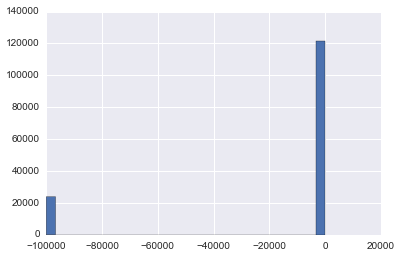

count    145231.000000
mean     -16430.393311
std       37056.634045
min      -99999.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          23.000000
Name: VAR_0810, dtype: float64


========== VAR_0003 ==================================
Possible nans:  [999]
Unique values:  588
Null count:  0
NV Criteria:  1428 143803 0.99%
Total count:  145231
---- Distribution of largest 5000 ----
999    1428
399     163
360     136
336      99
372      69
348      65
384      55
420      55
396      53
325      52
       ... 
664       1
668       1
804       1
852       1
543       1
531       1
517       1
533       1
537       1
521       1
dtype: int64
---- Distribution of smallest 5000 ----
0    5000
dtype: int64
---- Distribution ----
0      17436
24      3469
12      3271
60      3054
36      2498
72      2081
48      2048
6       1993
1       1797
3       1679
       ...  
533        1
636        1
975        1
973        1
587        1
523        1
584    

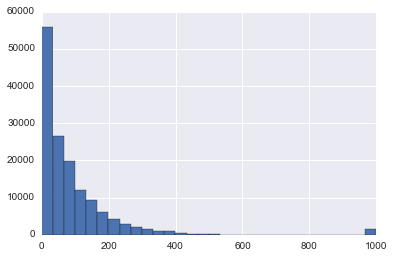

count    145231.000000
mean         88.492285
std         125.903323
min           0.000000
25%          13.000000
50%          55.000000
75%         120.000000
max         999.000000
Name: VAR_0003, dtype: float64


========== VAR_0806 ==================================
Possible nans:  [-99999]
Unique values:  34
Null count:  0
NV Criteria:  2095 143136 1.46%
Total count:  145231
---- Distribution of largest 5000 ----
8     1554
9      969
10     676
11     417
7      395
12     259
13     199
14     155
15      94
16      64
      ... 
22      10
23       8
24       5
27       5
26       3
29       2
28       2
39       1
37       1
33       1
dtype: int64
---- Distribution of smallest 5000 ----
 0        2905
-99999    2095
dtype: int64
---- Distribution ----
 1        36512
 2        29227
 0        26694
 3        19403
 4        12184
 5         7476
 6         4347
 7         2688
-99999     2095
 8         1554
          ...  
 22          10
 23           8
 27           5
 24

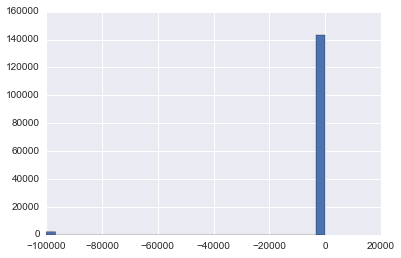

count    145231.000000
mean      -1440.233407
std       11923.790542
min      -99999.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          39.000000
Name: VAR_0806, dtype: float64


========== VAR_1399 ==================================
Possible nans:  [999999999, 999999998, 999999997, 999999996]
Unique values:  17471
Null count:  0
NV Criteria:  110253 34978 315.21%
Total count:  145231
---- Distribution of largest 5000 ----
999999998    4399
999999999     601
dtype: int64
---- Distribution of smallest 5000 ----
500     1728
1000    1330
300      174
250      133
1200     102
750       99
800       96
600       84
200       76
0         72
        ... 
1225       1
186        1
1237       1
1241       1
1245       1
18         1
42         1
142        1
146        1
1181       1
dtype: int64
---- Distribution ----
999999998    88382
999999997    16798
999999996     4472
500           1728
1000          1330
5000           770
2000           680
9999

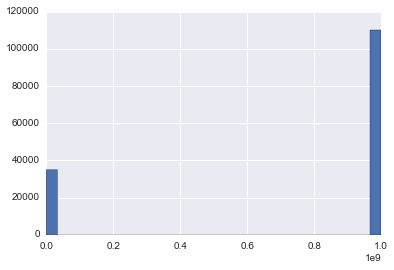

count    1.452310e+05
mean     7.591607e+08
std      4.275891e+08
min      0.000000e+00
25%      1.000000e+09
50%      1.000000e+09
75%      1.000000e+09
max      1.000000e+09
Name: VAR_1399, dtype: float64


========== VAR_0881 ==================================
Possible nans:  [-99999]
Unique values:  253
Null count:  0
NV Criteria:  35581 109650 32.45%
Total count:  145231
---- Distribution of largest 5000 ----
108     420
109     378
110     342
107     300
111     289
112     258
113     224
116     175
114     167
115     158
       ... 
221       1
217       1
209       1
177       1
243       1
259       1
412       1
284       1
276       1
1247      1
dtype: int64
---- Distribution of smallest 5000 ----
-99999    5000
dtype: int64
---- Distribution ----
-99999    35581
 100       5572
 99        3989
 98        3894
 0         3868
 97        3648
 96        3276
 95        3113
 94        2886
 93        2673
          ...  
 236          1
 658          1
 209          1
 1

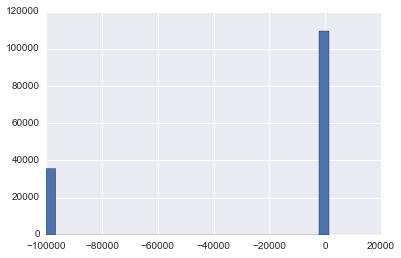

count    145231.000000
mean     -24442.300225
std       43040.699198
min      -99999.000000
25%           0.000000
50%          72.000000
75%          94.000000
max        1247.000000
Name: VAR_0881, dtype: float64


========== VAR_0896 ==================================
Possible nans:  [-99999]
Unique values:  17623
Null count:  0
NV Criteria:  35581 109650 32.45%
Total count:  145231
---- Distribution of largest 5000 ----
18662    6
19097    4
18541    4
20984    4
22915    4
20391    3
19607    3
17582    3
16642    3
27188    3
        ..
36079    1
48365    1
27883    1
21736    1
68839    1
23781    1
17634    1
17630    1
18503    1
40960    1
dtype: int64
---- Distribution of smallest 5000 ----
-99999    5000
dtype: int64
---- Distribution ----
-99999    35581
 0         3651
 500        368
 75         153
 300        119
 494        110
 299        110
 499        109
 302        103
 59         102
          ...  
 37937        1
 16987        1
 10838        1
 6736        

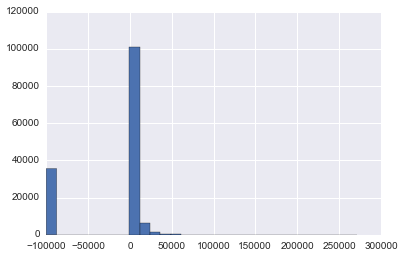

count    145231.000000
mean     -21536.006259
std       45107.635473
min      -99999.000000
25%           0.000000
50%         873.000000
75%        3033.000000
max      271708.000000
Name: VAR_0896, dtype: float64


========== VAR_0855 ==================================
Possible nans:  [-99999]
Unique values:  85
Null count:  0
NV Criteria:  69583 75648 91.98%
Total count:  145231
---- Distribution of largest 5000 ----
70    421
69    400
73    374
77    370
72    367
74    358
71    357
68    352
79    349
80    346
75    339
78    338
76    332
81    125
67    120
82     51
83      1
dtype: int64
---- Distribution of smallest 5000 ----
-99999    5000
dtype: int64
---- Distribution ----
-99999    69583
 1         9477
 0         4955
 2         4944
 3         3301
 4         2598
 5         2195
 6         1891
 7         1712
 8         1550
          ...  
 71         357
 68         352
 79         349
 80         346
 75         339
 78         338
 76         332
 81         12

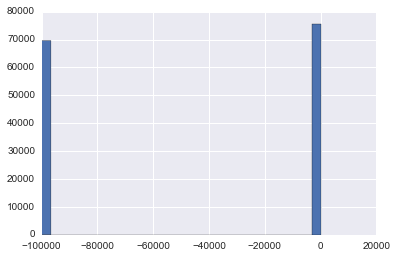

count    145231.000000
mean     -47899.974055
std       49967.080199
min      -99999.000000
25%      -99999.000000
50%           0.000000
75%          14.000000
max          83.000000
Name: VAR_0855, dtype: float64


========== VAR_1747 ==================================
Possible nans:  [999999998, 999999997, 999999996, 999999999]
Unique values:  18822
Null count:  0
NV Criteria:  84420 60811 138.82%
Total count:  145231
---- Distribution of largest 5000 ----
999999998    4399
999999999     601
dtype: int64
---- Distribution of smallest 5000 ----
500    93
300    86
250    68
258    54
400    48
480    43
200    41
420    36
406    36
390    35
       ..
16      1
237     1
47      1
45      1
132     1
9       1
22      1
21      1
78      1
19      1
dtype: int64
---- Distribution ----
999999998    38563
999999997    35358
999999996     9898
999999999      601
2600           500
1500           318
2598           179
500            147
850            131
2595           129
           

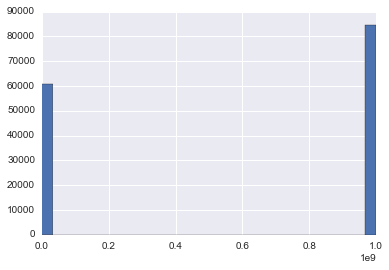

count    1.452310e+05
mean     5.812840e+08
std      4.933471e+08
min      1.000000e+00
25%      5.248000e+03
50%      1.000000e+09
75%      1.000000e+09
max      1.000000e+09
Name: VAR_1747, dtype: float64


========== VAR_0707 ==================================
Possible nans:  [-99999]
Unique values:  269
Null count:  0
NV Criteria:  9 145222 0.01%
Total count:  145231
---- Distribution of largest 5000 ----
123    259
122    243
124    229
127    218
125    215
126    210
128    180
129    178
130    161
132    151
      ... 
300      1
315      1
281      1
285      1
297      1
305      1
247      1
325      1
271      1
335      1
dtype: int64
---- Distribution of smallest 5000 ----
 9        554
 10       536
 6        510
 11       509
 8        503
 7        497
 5        446
 12       417
 4        364
 3        305
 2        229
 1        114
-99999      9
 0          7
dtype: int64
---- Distribution ----
64     1918
68     1902
62     1900
74     1896
65     1895
70     1894

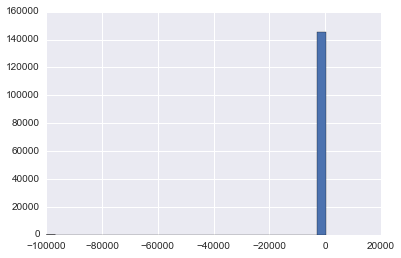

count    145231.000000
mean         58.101996
std         788.278756
min      -99999.000000
25%          43.000000
50%          64.000000
75%          84.000000
max         335.000000
Name: VAR_0707, dtype: float64


========== VAR_0807 ==================================
Possible nans:  [-99999]
Unique values:  18
Null count:  0
NV Criteria:  35581 109650 32.45%
Total count:  145231
---- Distribution of largest 5000 ----
4     2044
5     1666
6      710
7      306
8      138
9       65
10      34
11      21
12       7
13       4
14       3
19       1
15       1
dtype: int64
---- Distribution of smallest 5000 ----
-99999    5000
dtype: int64
---- Distribution ----
 0        38470
 1        37448
-99999    35581
 2        18408
 3         8439
 4         3929
 5         1666
 6          710
 7          306
 8          138
 9           65
 10          34
 11          21
 12           7
 13           4
 14           3
 19           1
 15           1
dtype: int64


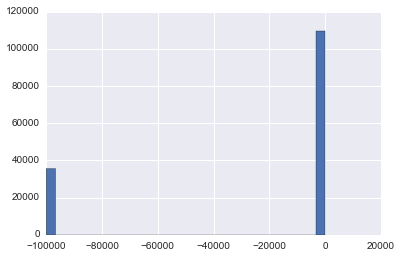

count    145231.000000
mean     -24498.432965
std       43008.714851
min      -99999.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: VAR_0807, dtype: float64


========== VAR_1329 ==================================
Possible nans:  [999, 998, 997, 996]
Unique values:  301
Null count:  0
NV Criteria:  37353 107878 34.63%
Total count:  145231
---- Distribution of largest 5000 ----
998    4399
999     601
dtype: int64
---- Distribution of smallest 5000 ----
0    3377
1     271
2     265
8     187
3     184
6     157
5     152
4     149
7     148
9     110
dtype: int64
---- Distribution ----
997    15049
998    12461
996     9242
100     7644
99      6660
101     6221
98      5559
102     4557
97      4394
96      3782
       ...  
352        1
310        1
426        1
271        1
435        1
270        1
356        1
283        1
269        1
255        1
dtype: int64


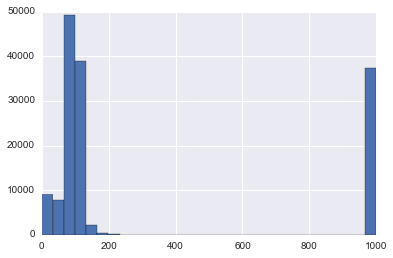

count    145231.000000
mean        322.446854
std         397.991005
min           0.000000
25%          92.000000
50%         100.000000
75%         996.000000
max         999.000000
Name: VAR_1329, dtype: float64


========== VAR_0970 ==================================
Possible nans:  [999999999, 999999998, 999999997, 999999996]
Unique values:  25981
Null count:  0
NV Criteria:  13009 132222 9.84%
Total count:  145231
---- Distribution of largest 5000 ----
999999998    2327
999999997    2072
999999999     601
dtype: int64
---- Distribution of smallest 5000 ----
0      2954
75      102
59       74
1        51
100      47
39       38
94       34
2        33
81       32
6        28
       ... 
76        8
73        8
27        8
78        8
85        8
93        7
48        7
23        6
8         6
18        5
dtype: int64
---- Distribution ----
999999997    5593
999999996    4488
0            2954
999999998    2327
999999999     601
500           209
2600          152
1500          15

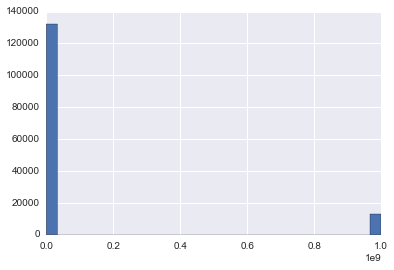

count    1.452310e+05
mean     8.958063e+07
std      2.855703e+08
min      0.000000e+00
25%      1.183000e+03
50%      3.981000e+03
75%      1.169800e+04
max      1.000000e+09
Name: VAR_0970, dtype: float64


In [37]:
nandict = {
'VAR_0810': [-99999],
'VAR_1747': [999999998, 999999997, 999999996, 999999999],
'VAR_0855': [-99999],
'VAR_0806': [-99999],
'VAR_0003': [999],
'VAR_1329': [999, 998, 997, 996],
'VAR_0970': [999999999, 999999998, 999999997, 999999996],
'VAR_0807': [-99999],
'VAR_0896': [-99999],
'VAR_1399': [999999999, 999999998, 999999997, 999999996],
'VAR_0707': [-99999],
'VAR_0881': [-99999],
}

for c, nv in nandict.items():
    print_one_col_report(c, nv, bigtrain)

In [4]:
def find_likely_nans(c, df):
    s = df.loc[:, c]
    toppers = s.value_counts().sort_index(ascending=False).iloc[:10]
    
    smean = s.mean()
    sstd = s.std()
    
    nanlist = []
    #print(toppers)
    for t,v in toppers.iteritems():
        if (t//10 != 0) & ((t//10)%9 == 0):
            q = t//10
            allnines = True
            while q>0:
                if (q%10 != 9):
                    allnines = False
                    break
                else:
                    q = q//10
            if allnines:
                #print(t, t//10, (t//10)%9)
                if (np.abs(t-smean)>5*sstd):
                    nanlist.append(t)
    if nanlist:
        #print(nanlist)
        #print(toppers)
        minnl = np.min(nanlist)
        maxnl = np.max(nanlist)
        
        # there shouldn't be anything above the identified max nan
        if (sum(toppers.index>maxnl)>0):
            #print(toppers.index)
            nanlist = []
        else:
            #print(toppers)
            
            # k1: atleast 10x more count at the identified min-niner
            k1 = False
            nextlowidx = (max(toppers[toppers.index<minnl].index))
            if(toppers[minnl]/toppers[nextlowidx] > 10): # at least 10x difference in count
                k1 = True
                #print('10x diff')
            
            # k2: no other elements that are closer to the min-niner
            k2 = True
            nmean = np.mean(nanlist)              # mean of niners
            nzscore = (nmean-smean)/sstd          # zscore of nmean
            nlimit = smean+(nzscore-1)*sstd       # closest that other toppers can come
            numclose = sum(toppers.index>nlimit)  # how many toppers are above this limit
            if numclose > len(nanlist):
                k2 = False
                #print(nzscore, nlimit, numclose)
                #print(nanlist)
                #print(toppers)
                
            if not (k1 or k2):
                nanlist = []
                    
    if (-1 in df.loc[:, c].values) & (df.loc[:, c].nunique() > 2):
        nanlist.append(-1)
        
    return nanlist

#find_likely_nans('VAR_0550', scom)

In [ ]:
def print_nan_candidates(df):
    for c in df.columns:
        nanlist = find_likely_nans(c, df)
        if nanlist:
            print('\'{}\': {},'.format(c, nanlist))
            
#print_nan_candidates(scom)

In [14]:
import operator
nulldict = {}
for c in bigtrain.columns:
    nullcount = bigtrain.loc[:, c].isnull().sum()
    totcount = len(bigtrain.loc[:, c])
    pctnulls = nullcount/totcount
    #print('nulls={}, total={}, pctnull={}'.format(nullcount, totcount, pctnulls))
    nulldict[c] = pctnulls
    
nulldict = sorted(nulldict.items(), key=operator.itemgetter(1), reverse=True)

In [15]:
for i,(k,v) in enumerate(nulldict):
    print(i, k, v)

0 VAR_0213 1.0
1 VAR_0207 1.0
2 VAR_0840 1.0
3 VAR_0214 0.999917373013
4 VAR_0157 0.993665264303
5 VAR_0158 0.985616018619
6 VAR_0205 0.984459240796
7 VAR_0206 0.983970364454
8 VAR_0167 0.982324710289
9 VAR_0177 0.976878214706
10 VAR_0159 0.959581632021
11 VAR_0156 0.959581632021
12 VAR_0209 0.935365039145
13 VAR_0168 0.926152130055
14 VAR_0178 0.916870365142
15 VAR_0166 0.902018164166
16 VAR_0169 0.902018164166
17 VAR_0179 0.87928197148
18 VAR_0176 0.87928197148
19 VAR_0210 0.866034111175
20 VAR_0211 0.866034111175
21 VAR_0208 0.866034111175
22 VAR_0074 0.696318279155
23 VAR_0073 0.696318279155
24 VAR_0212 0.0864140576048
25 VAR_0350 0.00638293477288
26 VAR_0481 0.00632096453237
27 VAR_0377 0.00632096453237
28 VAR_0407 0.00632096453237
29 VAR_0496 0.00632096453237
30 VAR_0293 0.00632096453237
31 VAR_0438 0.00632096453237
32 VAR_0256 0.00632096453237
33 VAR_0314 0.00632096453237
34 VAR_0290 0.00632096453237
35 VAR_0475 0.00632096453237
36 VAR_0319 0.00632096453237
37 VAR_0444 0.0063209

## Predictive Value Imputation

In [ ]:
# identify columns
# identify values needing imputation
# train using train+test data
# impute values, and construct new train/test matrix. pickle it.

In [104]:
def read_and_merge_test_train(trainf, testf):
    msg('    read_and_merge_test_train')
    msg('        reading train')
    strain = pd.read_csv(conf.basepath+trainf, dtype=pickle.load(open(conf.dtypesf, 'rb')), index_col='ID')
    msg('        reading test')
    stest = pd.read_csv(conf.basepath+testf, dtype=pickle.load(open(conf.dtypesf, 'rb')), index_col='ID')
    msg('        train={}, test={}'.format(len(strain), len(strain)))
    msg('        dropping target column from train')
    strain = strain.drop('target', axis=1)
    msg('        appending test to train')
    scom = strain.append(stest, verify_integrity=True)
    msg('        dropping non-numerical columns')
    scom = cleancols(scom)
    msg('        size of merged array = {}'.format(scom.shape))
    return scom
    
#read_and_merge_test_train('fulltrain.csv', 'fulltest.csv'):

In [39]:
tcom = read_and_merge_test_train('tinytrain.csv', 'tinytest.csv')
#tcom.loc[[2, 4], 'VAR_0003'] = 999
#tcom.loc[[6, 10], 'VAR_0003'] = np.NaN

reading train
reading test
train=9, test=9
dropping target column from train
appending test to train
dropping non-numerical columns
size of merged array = (18, 1881)


In [231]:
import pickle

def do_pvi(df, c, nv):
    """Do Predicted Value Imputation of the given column in 
    the df, by substituting the given list of values as well
    as real nulls with predicted values.
    """
    msg('* PVI for column = {}, values = {}'.format(c, nv))
    pdict = make_pred_dict(df, c, nv)
    msg('    pickling results')
    pickle.dump(pdict, open(conf.basepath+'pdicts/'+c, 'wb'))
    msg('==================================================')

def do_pvi_for_all(nandict):
    df = read_and_merge_test_train('train.csv', 'test.csv')
    os.makedirs(conf.basepath+'pdicts/', exist_ok=True)
    for c, nv in nandict.items():
        do_pvi(df, c, nv)
    msg('Completed PVI')
    
nandict = {
'VAR_0003': [999],
'VAR_0242': [-1],
'VAR_0243': [-1],
'VAR_0248': [-1],
'VAR_0250': [-1],
'VAR_0251': [-1]}
do_pvi_for_all(nandict)

10-04:17:14: read_and_merge_test_train
10-04:17:14:     reading train
10-04:17:15:     reading test
10-04:17:16:     train=1999, test=1999
10-04:17:16:     dropping target column from train
10-04:17:16:     appending test to train
10-04:17:16:     dropping non-numerical columns
10-04:17:16:     size of merged array = (3998, 1881)
10-04:17:16: * PVI for column = VAR_0243, values = [-1]
10-04:17:16: make_pred_dict
10-04:17:16:     generating criteria for row selection
10-04:17:16:     selecting train/test rows
10-04:17:16:     fitting reg
10-04:17:24:     doing pred
10-04:17:24:     preparing return dict
10-04:17:24:     pickling results
10-04:17:24: ==================================================
10-04:17:24: * PVI for column = VAR_0251, values = [-1]
10-04:17:24: make_pred_dict
10-04:17:24:     generating criteria for row selection
10-04:17:24:     selecting train/test rows
10-04:17:24:     fitting reg
10-04:17:32:     doing pred
10-04:17:32:     preparing return dict
10-04:17:32:  

In [217]:
import xgboost as xgb

def make_pred_dict(df, c, nv):
    msg('make_pred_dict')
    # columns other than the one for which we are trying to predict
    othercols = list(df.columns)
    othercols.remove(c)
    
    msg('    generating criteria for row selection')
    # either the value is one of the null-like-values or the column is really null
    criteria = ((df.loc[:, c].isin(nv)) | df.loc[:, c].isnull())
    
    msg('    selecting train/test rows')
    xtrain = df.loc[~criteria, othercols].values
    xtestwithidx = df.loc[criteria, othercols]
    xtest = xtestwithidx.values
    ytrain = df.loc[~criteria, c].values
    
    msg('    fitting reg')
    clf = xgb.XGBRegressor(seed=0).fit(xtrain, ytrain)
    msg('    doing pred')
    ypred = clf.predict(xtest)
    
    msg('    preparing return dict')
    return {k:v for k,v in zip(xtestwithidx.index, ypred)}

In [232]:
import os
def update_df_with_pkldicts(df):
    msg('update_df_with_pkldicts')
    pklcols = os.listdir(conf.basepath+'pdicts/')
    for c in pklcols:
        msg('    * loading pkl for column {}'.format(c))
        d = pickle.load(open(conf.basepath+'pdicts/'+c, 'rb'))
        msg('        updating df column {}'.format(c))
        df.loc[:, c].update(pd.Series(d))
        
updtrain = read_csv_or_pickle(conf.trainpkl, conf.trainf)
updtrain.set_index('ID', inplace=True)
update_df_with_pkldicts(updtrain)
updtrain.reset_index(inplace=True)

10-04:30:30:     found pickle file /Users/aa/lab/kaggle/springleaf/data/train.pkl. reading from it
10-04:30:31: update_df_with_pkldicts
10-04:30:31:     * loading pkl for column VAR_0003
10-04:30:31:         updating df column VAR_0003
10-04:30:31:     * loading pkl for column VAR_0242
10-04:30:31:         updating df column VAR_0242
10-04:30:31:     * loading pkl for column VAR_0243
10-04:30:31:         updating df column VAR_0243
10-04:30:31:     * loading pkl for column VAR_0248
10-04:30:31:         updating df column VAR_0248
10-04:30:31:     * loading pkl for column VAR_0250
10-04:30:31:         updating df column VAR_0250
10-04:30:31:     * loading pkl for column VAR_0251
10-04:30:31:         updating df column VAR_0251


In [230]:
updtrain.head()

ID  VAR_0217_DAY  VAR_0217_MON  VAR_0217_ORD  VAR_0217_WKDAY  \
0   2             8            11        734449               1   
1   4             2            10        734778               1   
2   5            13            12        734484               1   
3   7             1            11        734808               3   
4   8            15            10        734425               5   

   VAR_0217_YEAR  VAR_0204_DAY  VAR_0204_MON  VAR_0204_ORD  VAR_0204_WKDAY  \
0           2011            29             1        735262               2   
1           2012             1             2        735265               5   
2           2011            30             1        735263               3   
3           2012             1             2        735265               5   
4           2011            29             1        735262               2   

   VAR_0204_YEAR  VAR_0179_DAY  VAR_0179_MON  VAR_0179_ORD  VAR_0179_WKDAY  \
0           2014            -1            -1            -1              -1   
1           2014            -1            -1            -1              -1   
2           2014            -1            -1            -1              -1   
3           2014            -1            -1            -1              -1   
4           2014            -1            -1            -1              -1   

   VAR_0179_YEAR  VAR_0178_DAY  VAR_0178_MON  VAR_0178_ORD  VAR_0178_WKDAY  \
0             -1            -1            -1            -1              -1   
1             -1            -1            -1            -1              -1   
2             -1            -1            -1            -1              -1   
3             -1            -1            -1            -1              -1   
4             -1            -1            -1            -1              -1   

   VAR_0178_YEAR  VAR_0177_DAY  VAR_0177_MON  VAR_0177_ORD  VAR_0177_WKDAY  \
0             -1            -1            -1            -1              -1   
1             -1            -1            -1            -1              -1   
2             -1            -1            -1            -1              -1   
3             -1            -1            -1            -1              -1   
4             -1            -1            -1            -1              -1   

   VAR_0177_YEAR  VAR_0176_DAY  VAR_0176_MON  VAR_0176_ORD  VAR_0176_WKDAY  \
0             -1            -1            -1            -1              -1   
1             -1            -1            -1            -1              -1   
2             -1            -1            -1            -1              -1   
3             -1            -1            -1            -1              -1   
4             -1            -1            -1            -1              -1   

   VAR_0176_YEAR  VAR_0169_DAY  VAR_0169_MON  VAR_0169_ORD  VAR_0169_WKDAY  \
0             -1            -1            -1            -1              -1   
1             -1            -1            -1            -1              -1   
2             -1            -1            -1            -1              -1   
3             -1            -1            -1            -1              -1   
4             -1            -1            -1            -1              -1   

   VAR_0169_YEAR  VAR_0168_DAY  VAR_0168_MON  VAR_0168_ORD  VAR_0168_WKDAY  \
0             -1            -1            -1            -1              -1   
1             -1            -1            -1            -1              -1   
2             -1            -1            -1            -1              -1   
3             -1            -1            -1            -1              -1   
4             -1            -1            -1            -1              -1   

   VAR_0168_YEAR  VAR_0167_DAY  VAR_0167_MON  VAR_0167_ORD  VAR_0167_WKDAY  \
0             -1            -1            -1            -1              -1   
1             -1            -1            -1            -1              -1   
2             -1            -1            -1            -1              -1   
3    